<a href="https://colab.research.google.com/github/lucienrivat/PommePOire/blob/main/PommePoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10038260/10038260 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16550943/16550943 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26236/26236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 4712 files belonging to 3 classes.
Using 3770 files for training.
Found 4712 files belonging to 3 classes.
Using 942 files for validation.


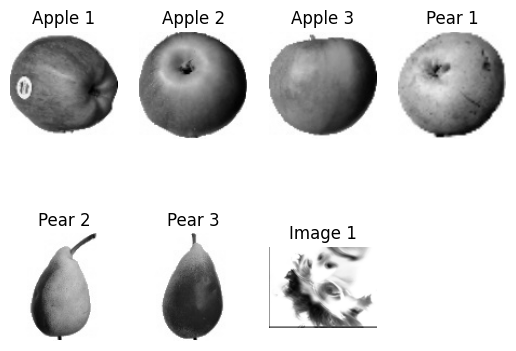

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import pathlib
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files

# Fonction pour convertir toutes les images en niveaux de gris
def convert_to_grayscale(input_folder):
    for img_path in pathlib.Path(input_folder).rglob("*.*"):
        img = cv2.imread(str(img_path))
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(str(img_path), gray_img)

# Télécharger et extraire les fichiers ZIP Apple et Pear
apple_zip = tf.keras.utils.get_file("Apple.zip", "https://github.com/lucienrivat/PommePOire/raw/main/apple.zip", extract=False)
pear_zip = tf.keras.utils.get_file("Pear.zip", "https://github.com/lucienrivat/PommePOire/raw/main/pear.zip", extract=False)

with zipfile.ZipFile(apple_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/')
with zipfile.ZipFile(pear_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/')

# Définir les chemins
apple_data_dir = pathlib.Path('/content/datasets/apple')
pear_data_dir = pathlib.Path('/content/datasets/pear')

# Convertir toutes les images en niveaux de gris
convert_to_grayscale(apple_data_dir)
convert_to_grayscale(pear_data_dir)

# Paramètres
data_dir = pathlib.Path('/content/datasets/')
batch_size = 3
img_height = 200
img_width = 200

# Charger le dataset avec un traitement en niveaux de gris
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training", seed=42,
    image_size=(img_height, img_width), batch_size=batch_size, color_mode='grayscale'
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation", seed=42,
    image_size=(img_height, img_width), batch_size=batch_size, color_mode='grayscale'
)

import collections

train_labels = []
for images, labels in train_data:
    train_labels.extend(labels.numpy())

# Sélectionner 3 images aléatoires d'Apple
for _ in range(3):
    apple_image = random.choice(list(apple_data_dir.glob('*/*.jpg')))
    img_apple = mpimg.imread(apple_image)
    images_to_display.append(img_apple)

# Sélectionner 3 images aléatoires de Pear (à partir de sous-dossiers)
pear_subfolders = [folder for folder in os.listdir(pear_data_dir) if os.path.isdir(os.path.join(pear_data_dir, folder))]

for _ in range(3):
    chosen_pear_folder = random.choice(pear_subfolders)
    pear_images = list(pathlib.Path(pear_data_dir, chosen_pear_folder).glob('*.*'))
    random_pear_image = random.choice(pear_images)
    img_pear = mpimg.imread(random_pear_image)
    images_to_display.append(img_pear)

# Afficher les images sélectionnées
for i, img in enumerate(images_to_display):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    if i < 3:
        plt.title(f"Apple {i + 1}")
    else:
        plt.title(f"Pear {i - 2}")
plt.show()


In [ ]:
# Définition du modèle CNN adapté aux images en niveaux de gris
num_classes = 2
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Entraînement
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1, write_images=True)

class_weights = {0: len(train_labels) / 958, 1: len(train_labels) / 4184}

history = model.fit(train_data, validation_data=val_data, epochs=15, callbacks=[tensorboard_callback])

model.fit(
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 197, 197, 128)       │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 95, 95, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          83,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,664 (2.99 MB)

 Trainable params: 261,554 (1021.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 523,110 (2.00 MB)

Saving R.png to R (3).png


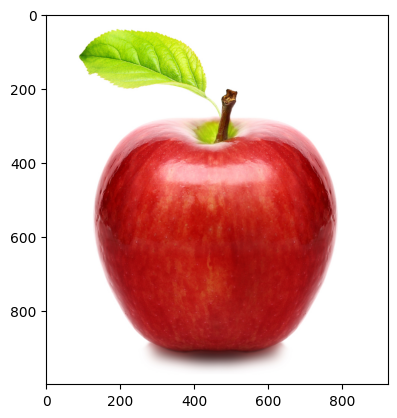

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
Prediction : [[0. 1.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from google.colab import files
import cv2
import numpy as np
import pathlib
import random
import matplotlib.pyplot as plt
import os

# Fonction pour charger et prédire une image
def predict_image(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image, (200, 200)), axis=0)
    res = model.predict(img_to_predict)
    return res

# Demander à l'utilisateur de télécharger une image depuis son PC
file_to_predict = files.upload()

# Traiter chaque fichier téléchargé
for file_ in file_to_predict:
    # Charger l'image
    image_path = file_

    # Prédiction et affichage
    res = predict_image(image_path)

    # Afficher le résultat
    print(f"Prediction : {res}")

    # Déterminer si c'est une pomme ou une poire selon la prédiction
    if res == 1:  # Supposons que 1 soit pour la poire et 0 pour la pomme
        print("C'est une poire !")
    elif res == 0:
        print("C'est une pomme !")
